# Cálculo de engranes

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def ley_fundamental_engranes(N_g, N_p):
    print(f"La razón de velocidades del engrane es: {N_p / N_g:.3f}:1 ")

#### Conversión de unidades

In [4]:
def inch_to_mm(value):
    return value * 25.4

def mm_to_inch(value):
    return value / 25.4

def rad_to_deg(value):
    return value * (180 / np.pi)

def deg_to_rad(value):
    return value * (np.pi / 180)

## Parámetros geométricos de los engranes

### 1) Cálculo de la longitud de acción

$$ Z = \sqrt{(r_g + a_g)^2 + (r_g \cos(\phi))^2 } + \sqrt{(r_p + a_p)^2 + (r_p \cos(\phi))^2 } - (r_g + r_p) \sin(\phi)$$

In [5]:
def longitud_accion(r_g, a_g, r_p, a_p, phi):
    """
    Cálculo de la longitud de acción entre dos engranajes.
    
    Parámetros:
    r_g: Radio de paso del engranaje
    a_g: Addendum engranaje
    r_p: Radio de paso del piñón
    a_p: Addendum piñón
    phi: Ángulo de presión en radianes
    
    Retorna:
    Longitud de acción
    """
    return np.sqrt((r_g + a_g)**2 + (r_g * np.cos(phi))**2) + \
           np.sqrt((r_p + a_p)**2 + (r_p * np.cos(phi))**2) - \
           (r_g + r_p) * np.sin(phi)

### 2) Ángulo ataque y ángulo salida engrane

Ángulo ataque engrane:

$$ \sin \alpha_{ag} = \frac{\sqrt{(r_g + a_g)^2 + (r_g \cos(\phi))^2 } - r_g \sin (\phi)}{(r_g + a_g) \cos{\phi}}$$

Ángulo salida engrane:

$$ \alpha_{sg} = \phi - \tan^{-1}(\frac{\sqrt{(r_g + a_g)^2 + (r_g \cos(\phi))^2 } - Z}{r_g \cos \phi})$$

### 3) Ángulo ataque y ángulo salida piñón

Ángulo ataque piñón:

$$ \alpha_{ap} = \phi + \tan^{-1}(\frac{\sqrt{(r_g + a_g)^2 + (r_g \cos(\phi))^2 } - (r_g + r_p) \sin (\phi)}{r_g \cos \phi})$$

Ángulo salida piñón:

$$ \sin \alpha_{sp} = \frac{r_g \sin \phi - \sqrt{(r_g + a_g)^2 + (r_g \cos(\phi))^2} + Z}{(r_p + a_p) \cos \phi}$$

### 4) Nomenclatura de los engranes

Paso circular:

$$ p_c = \frac{\pi d}{N}$$

Paso de base:
$$ p_b = p_c \cdot \cos(\phi)$$

Paso diametral:

$$ p_d = \frac{N}{d}$$

Módulo:

$$ m = \frac{d}{N}$$

Razón de contacto:

$$ m_p = \frac{Z}{p_b} $$

In [6]:
def paso_circular(d, N):
    return (np.pi * d) / N

def paso_base(d, N, phi):
    return (paso_circular(d, N)) * np.cos(phi)

def paso_diametral(d, N): # Ojo que sólo se mide en pulgadas
    return N / d

def modulo(d, N):
    return d / N

def razon_de_contacto(r_g, a_g, r_p, a_p, phi, N_g):
    Z = longitud_accion(r_g, a_g, r_p, a_p, phi)
    p_b = paso_base(2 * r_g, N_g, phi)
    return Z / p_b

### 5) Dientes estándar para engranes rectos:

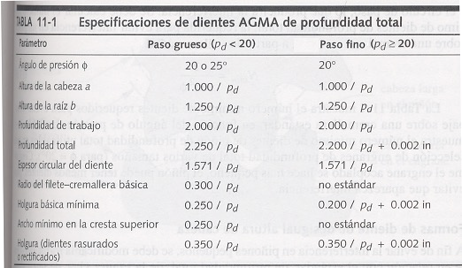

In [7]:
def addendum_deddendum(p_d):

    a = 1.000 / p_d
    b = 1.250 / p_d

    return a, b

### 6) Chequear interferencia entre engranes

Para que un engranaje no sufra interferencia, tanto el piñón como el engrane deben cumplir la siguiente condición:

$$ d_b - d_{raiz} < 0.5 \cdot a$$

In [8]:
def chequear_interferencia(d, m):
    a, b = addendum_deddendum(m)
    d_b = d * np.cos(deg_to_rad(20))
    d_raiz = d - (2 * b)

    if (d_b - d_raiz) < (0.5 * a):
        print(f"No hay interferencia 😁")

    else:
        print(f"Hay interferenica ‼️")

### 7) Chequear la razón de contacto:

$$ 1.4 < m_p < 2$$

In [9]:
def chequear_razon_contacto(r_g, a_g, r_p, a_p, phi, N_g):
    razon = razon_de_contacto(r_g, a_g, r_p, a_p, phi, N_g)
    if razon < 2 and razon > 1.4:
        print(f"Se cumple la razón de contacto 😁")
    else:
        print(f"No se cumple la razón de contacto ‼️")

## Parámetros de resistencia del engrane

### Fuerzas radial, tangencial y total

Fuerza tangencial:
$$ W_t = \frac{2T}{d}$$

Fuerza radial:

$$ W_r = W_t \tan \phi$$

Fuerza total:

$$ W = \frac{W_t}{\cos \phi}$$

In [ ]:
def fuerza_tangencial(T, d):
    return (2 * T) / d

def fuerza_radial(T, d, phi):
    return fuerza_tangencial(T, d) * np.tan(deg_to_rad(phi))

def fuerza_total(T, d, phi):
    return (fuerza_tangencial(T, d)) / np.cos(deg_to_rad(phi))

### Esfuerzo por flexión:

$$ \sigma = \frac{W_t}{FmJ} \frac{K_a K_m}{K_v} K_s K_B K_I $$

Donde:



- $\sigma$: Esfuerzo por flexión
- $W_t$: Fuerza tangencial transimitda
- $F$: Ancho de la cara del diente
- $m$: Módulo métrico
- $J$: Factor geométrico de flexión
- $K_a$: Factor de aplicación
- $K_m$: Factor de distribución de carga
- $K_v$: Factor dinámico
- $K_s$: Factor de tamaño
- $K_B$: Factor de espesor del aro
- $K_I$: Factor de engrane intermedio


#### $J$: Factor geométrico

#### $K_a$: Factor de aplicación

In [ ]:
def k_a(tipo_carga):
    if tipo_carga == "suave":
        return 1
    elif tipo_carga == "intermedia":
        return 2
    elif tipo_carga == "violenta":
        return 3

#### $K_m$ Factor de distribución de carga

#### $K_v$: Factor dinámico

In [ ]:
def k_v(quality, omega, d):
    velocity = omega * d / 2
    if quality <= 5:
        B = 1
    else:
        B =  ((12 - quality) ** (2/3))/ 4

    A = 50 + (56 * (1 - B))
    K_v = (A / (A + np.sqrt(200 * velocity))) ** (B)
    return K_v

#### $K_s$: Factor de tamaño

![Captura de pantalla 2025-08-20 a la(s) 15.13.24.png](<attachment:Captura de pantalla 2025-08-20 a la(s) 15.13.24.png>)
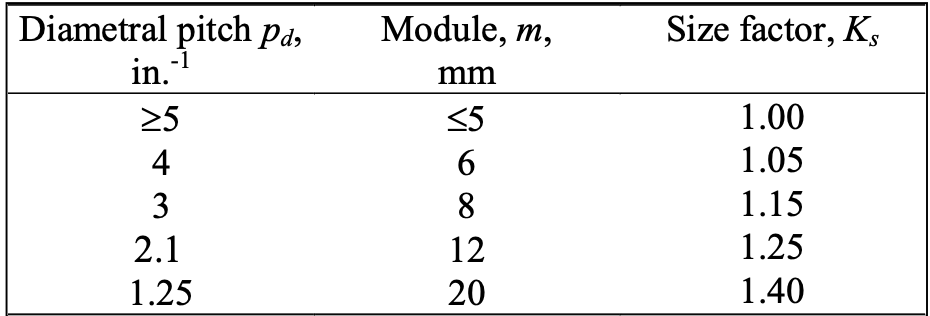

In [ ]:
def k_s(m):
    if m <= 5:
        return 1
    if m == 6:
        return 1.05
    if m == 8:
        return 1.15
    if m == 12:
        return 1.25
    elif m == 20:
        return 1.40

#### $K_B$: Factor de espesor del aro

#### $K_I$: Factor del engrane intermedio

In [ ]:
def K_I(type):
    if type == "intermedio":
        return 1.42
    else:
        return 1